# Compare catalog and original implementation of Websky radio sources
> `rg2` and `rg3` compared to `rg1`

In [1]:
import os

# for jupyter.nersc.gov otherwise the notebook only uses 2 cores

os.environ["OMP_NUM_THREADS"] = "48"

In [2]:
import numpy as np
import healpy as hp
import pysm3
from pysm3 import units as u
from pysm3.models import PointSourceCatalog
import matplotlib.pyplot as plt
import xarray as xr
import h5py
import gc
import sys

In [3]:
pysm3.set_verbosity()

In [4]:
nside = 2048

In [5]:
fwhm = {8192: 0.9 * u.arcmin, 4096: 2.6 * u.arcmin, 2048: 5.1 * u.arcmin}                                                                                                                 

In [6]:
freq = [80, 100] * u.GHz

In [7]:
sky = pysm3.Sky(nside=nside, preset_strings=["rg2"])

2025-03-06 11:23:45,616 - pysm3 - INFO - Access data from /mnt/sdceph/users/azonca/pysm-data/websky/0.4/radio_catalog/websky_high_flux_catalog_1mJy.h5


In [8]:
flux = sky.components[0].get_fluxes(freq)

In [9]:
flux.value.min()

0.0

In [10]:
thresholds = np.logspace(-3, -9, 5) * u.Jy
percent_below_thresholds = [(flux < threshold).sum() / len(flux) * 100 for threshold in thresholds]

for threshold, percent in zip(thresholds, percent_below_thresholds):
    print(f"Threshold: {threshold:.1e}, Percent below threshold: {percent:.4f}%")


Threshold: 1.0e-03 Jy, Percent below threshold: 1.3711%
Threshold: 3.2e-05 Jy, Percent below threshold: 0.0054%
Threshold: 1.0e-06 Jy, Percent below threshold: 0.0054%
Threshold: 3.2e-08 Jy, Percent below threshold: 0.0054%
Threshold: 1.0e-09 Jy, Percent below threshold: 0.0054%


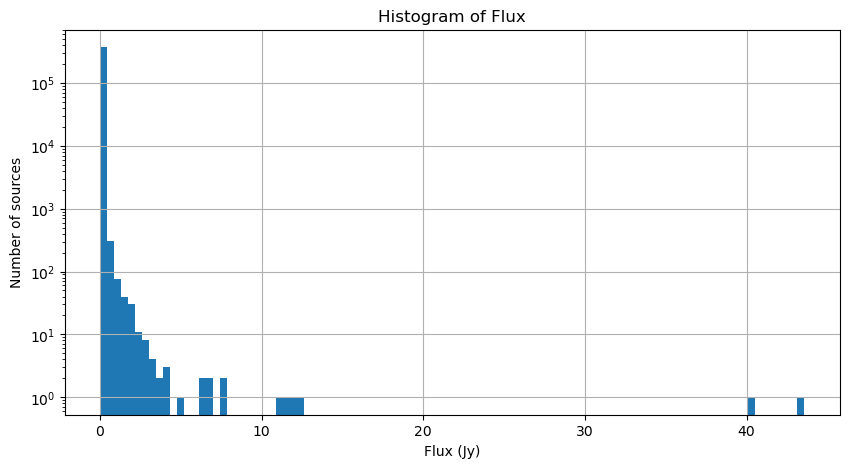

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(flux.value, bins=100, log=True)
plt.xlabel('Flux (Jy)')
plt.ylabel('Number of sources')
plt.title('Histogram of Flux')
plt.grid()
plt.show()

In [12]:
bright = sky.get_emission(
    freq,
    fwhm=fwhm[nside],
    return_car=False,
)

2025-03-06 11:23:48,754 - pysm3 - INFO - HEALPix map resolution: 1.72e+00 arcmin, nside 2048
2025-03-06 11:23:48,755 - pysm3 - INFO - Rounded CAR map resolution: 0.86 arcmin
2025-03-06 11:23:48,755 - pysm3 - INFO - Rounded CAR map resolution: 0.86 arcmin
2025-03-06 11:23:48,755 - pysm3 - INFO - Computing fluxes for I
2025-03-06 11:23:49,006 - pysm3 - INFO - Fluxes for I computed for 0.37 million sources
2025-03-06 11:23:49,009 - pysm3 - INFO - CAR map shape (3, 12575, 25150)
2025-03-06 11:23:50,238 - pysm3 - INFO - Reading pointing
2025-03-06 11:23:50,249 - pysm3 - INFO - Reading pointing completed
2025-03-06 11:23:50,396 - pysm3 - INFO - Executing sim_objects for I
2025-03-06 11:23:56,372 - pysm3 - INFO - Execution of sim_objects for I completed
2025-03-06 11:23:56,373 - pysm3 - INFO - Computing fluxes for Q/U
2025-03-06 11:23:56,623 - pysm3 - INFO - Fluxes for Q/U computed for 0.37 million sources
2025-03-06 11:23:56,627 - pysm3 - INFO - Executing sim_objects for Q/U
2025-03-06 11:24

In [13]:
background = pysm3.Sky(nside=nside, preset_strings=["rg3"]).get_emission(freq, lmax=int(2.5*nside), fwhm=10*u.arcmin)

2025-03-06 11:24:17,716 - pysm3 - INFO - Frequencies considered: [ 70. 100.]
2025-03-06 11:24:17,775 - pysm3 - INFO - Reading map websky/0.4/radio_catalog/background/{nside}/070.0.fits
2025-03-06 11:24:17,777 - pysm3 - INFO - Access data from /mnt/sdceph/users/azonca/pysm-data/websky/0.4/radio_catalog/background/2048/070.0.fits
2025-03-06 11:24:19,814 - pysm3 - INFO - Mean emission at 70.0 GHz in I: 0.9803 uK_RJ
2025-03-06 11:24:19,830 - pysm3 - INFO - Mean emission at 70.0 GHz in Q: -3.285e-06 uK_RJ
2025-03-06 11:24:19,847 - pysm3 - INFO - Mean emission at 70.0 GHz in U: 4.315e-06 uK_RJ
2025-03-06 11:24:19,942 - pysm3 - INFO - Reading map websky/0.4/radio_catalog/background/{nside}/100.0.fits
2025-03-06 11:24:19,944 - pysm3 - INFO - Access data from /mnt/sdceph/users/azonca/pysm-data/websky/0.4/radio_catalog/background/2048/100.0.fits
2025-03-06 11:24:21,369 - pysm3 - INFO - Mean emission at 100.0 GHz in I: 0.3938 uK_RJ
2025-03-06 11:24:21,386 - pysm3 - INFO - Mean emission at 100.0 G

In [14]:
websky = pysm3.Sky(nside=nside, preset_strings=["rg1"]).get_emission(freq)

2025-03-06 11:26:35,435 - pysm3 - INFO - Frequencies considered: [ 79.6  90.2 100. ]
2025-03-06 11:26:35,439 - pysm3 - INFO - Access data from /mnt/sdceph/users/azonca/pysm-data/websky/0.4/radio/radio_0079.6.fits
2025-03-06 11:26:35,439 - pysm3 - INFO - Reading map /mnt/sdceph/users/azonca/pysm-data/websky/0.4/radio/radio_0079.6.fits
2025-03-06 11:26:35,440 - pysm3 - INFO - Access data from /mnt/sdceph/users/azonca/pysm-data/websky/0.4/radio/radio_0079.6.fits
2025-03-06 11:26:37,190 - pysm3 - INFO - Access data from /mnt/sdceph/users/azonca/pysm-data/websky/0.4/radio/radio_0079.6.fits
2025-03-06 11:26:51,344 - pysm3 - INFO - Mean emission at 79.6 GHz in I: 1.951 uK_RJ
2025-03-06 11:26:51,346 - pysm3 - INFO - Access data from /mnt/sdceph/users/azonca/pysm-data/websky/0.4/radio/radio_0090.2.fits
2025-03-06 11:26:51,347 - pysm3 - INFO - Reading map /mnt/sdceph/users/azonca/pysm-data/websky/0.4/radio/radio_0090.2.fits
2025-03-06 11:26:51,348 - pysm3 - INFO - Access data from /mnt/sdceph/us

In [15]:
websky = pysm3.apply_smoothing_and_coord_transform(websky, fwhm=fwhm[nside])

2025-03-06 11:27:25,529 - pysm3 - INFO - Setting lmax to 5120
2025-03-06 11:29:29,949 - pysm3 - WARNING - hp.map2alm_lsq did not converge in 10 iterations, residual relative error is 0.69
2025-03-06 11:29:29,951 - pysm3 - INFO - Smoothing with fwhm of 5.1 arcmin
2025-03-06 11:29:30,767 - pysm3 - INFO - Alm to map HEALPix


In [16]:
websky[0].max()

<Quantity 75931.1661352 uK_RJ>

In [17]:
bright[0].max()

<Quantity 66457.06 uK_RJ>

In [18]:
background[0].max()

<Quantity 2.81300381 uK_RJ>

In [19]:
P_websky = np.sqrt(websky[1]**2 + websky[2]**2)
P_bright = np.sqrt(bright[1]**2 + bright[2]**2)
P_background = np.sqrt(background[1]**2 + background[2]**2)

print("Websky P - Min:", P_websky.min(), "Mean:", P_websky.mean(), "Max:", P_websky.max())
print("Bright P - Min:", P_bright.min(), "Mean:", P_bright.mean(), "Max:", P_bright.max())
print("Background P - Min:", P_background.min(), "Mean:", P_background.mean(), "Max:", P_background.max())

Websky P - Min: 0.0 uK_RJ Mean: 0.0 uK_RJ Max: 0.0 uK_RJ
Bright P - Min: 0.0 uK_RJ Mean: 0.02969113551080227 uK_RJ Max: 6156.7861328125 uK_RJ
Background P - Min: 2.9293689560222877e-07 uK_RJ Mean: 0.004870651403870899 uK_RJ Max: 0.3949189608722798 uK_RJ


In [20]:
%matplotlib inline

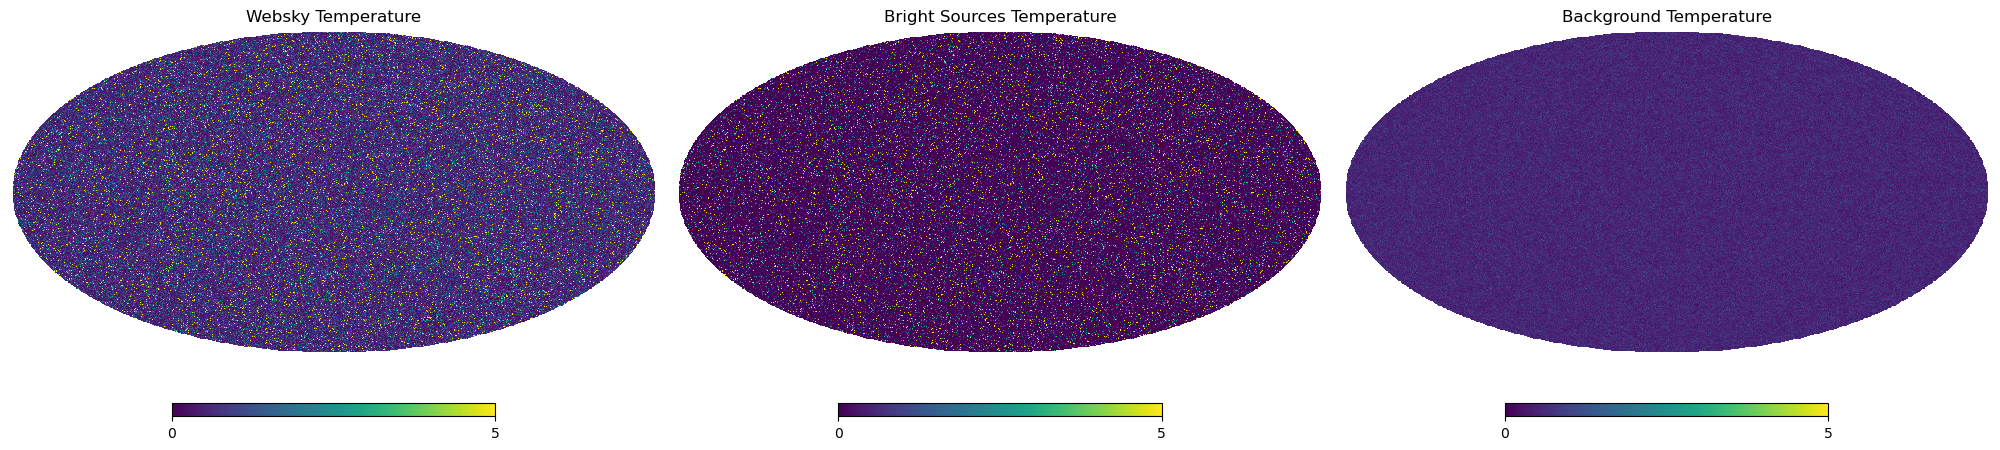

In [34]:
fig = plt.figure(figsize=(20,10))

hp.mollview(websky[0], min=0, max=5, title="Websky Temperature", sub=(1, 3, 1))
hp.mollview(bright[0], min=0, max=5, title="Bright Sources Temperature", sub=(1, 3, 2))
hp.mollview(background[0], min=0, max=5, title="Background Temperature", sub=(1, 3, 3))

plt.show()

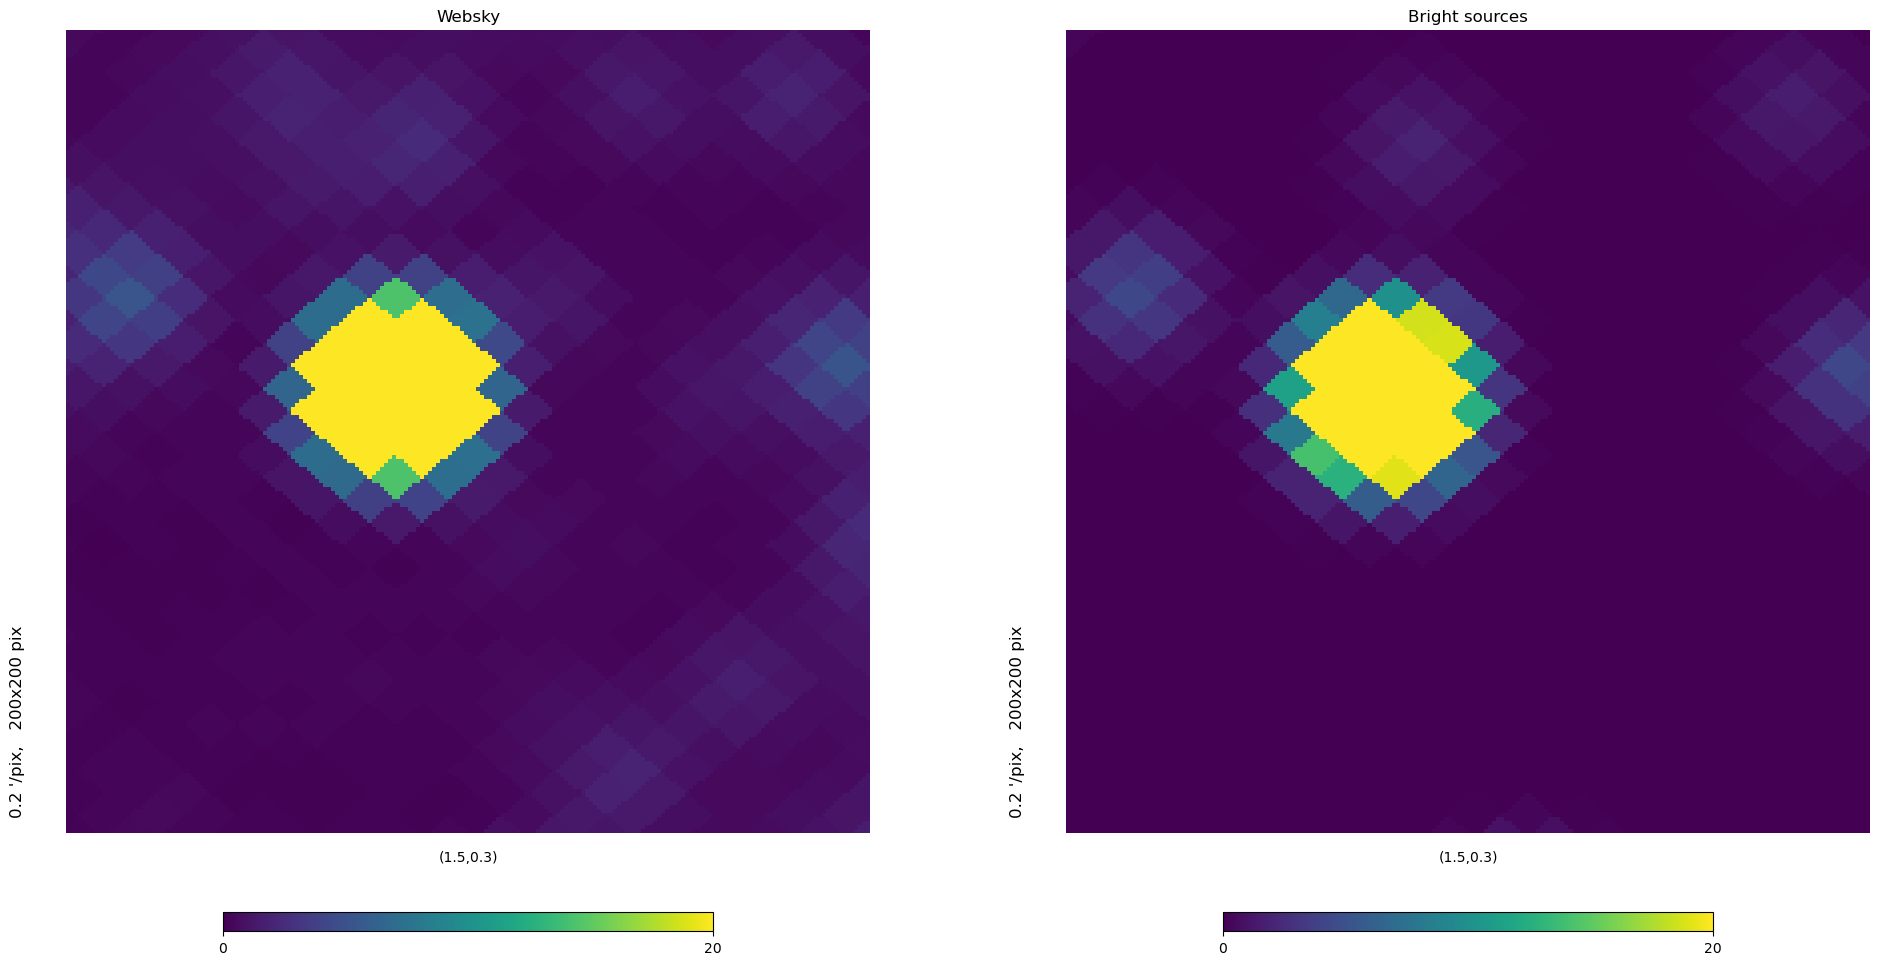

In [22]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], rot=(1.5, .3), reso=.2, min=0, max=20, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], rot=(1.5, .3), reso=.2, min=0, max=20, title="Bright sources", fig=fig, sub=122)

In [23]:
lon, lat = hp.pix2ang(nside, bright[0].argmax(), lonlat=True)

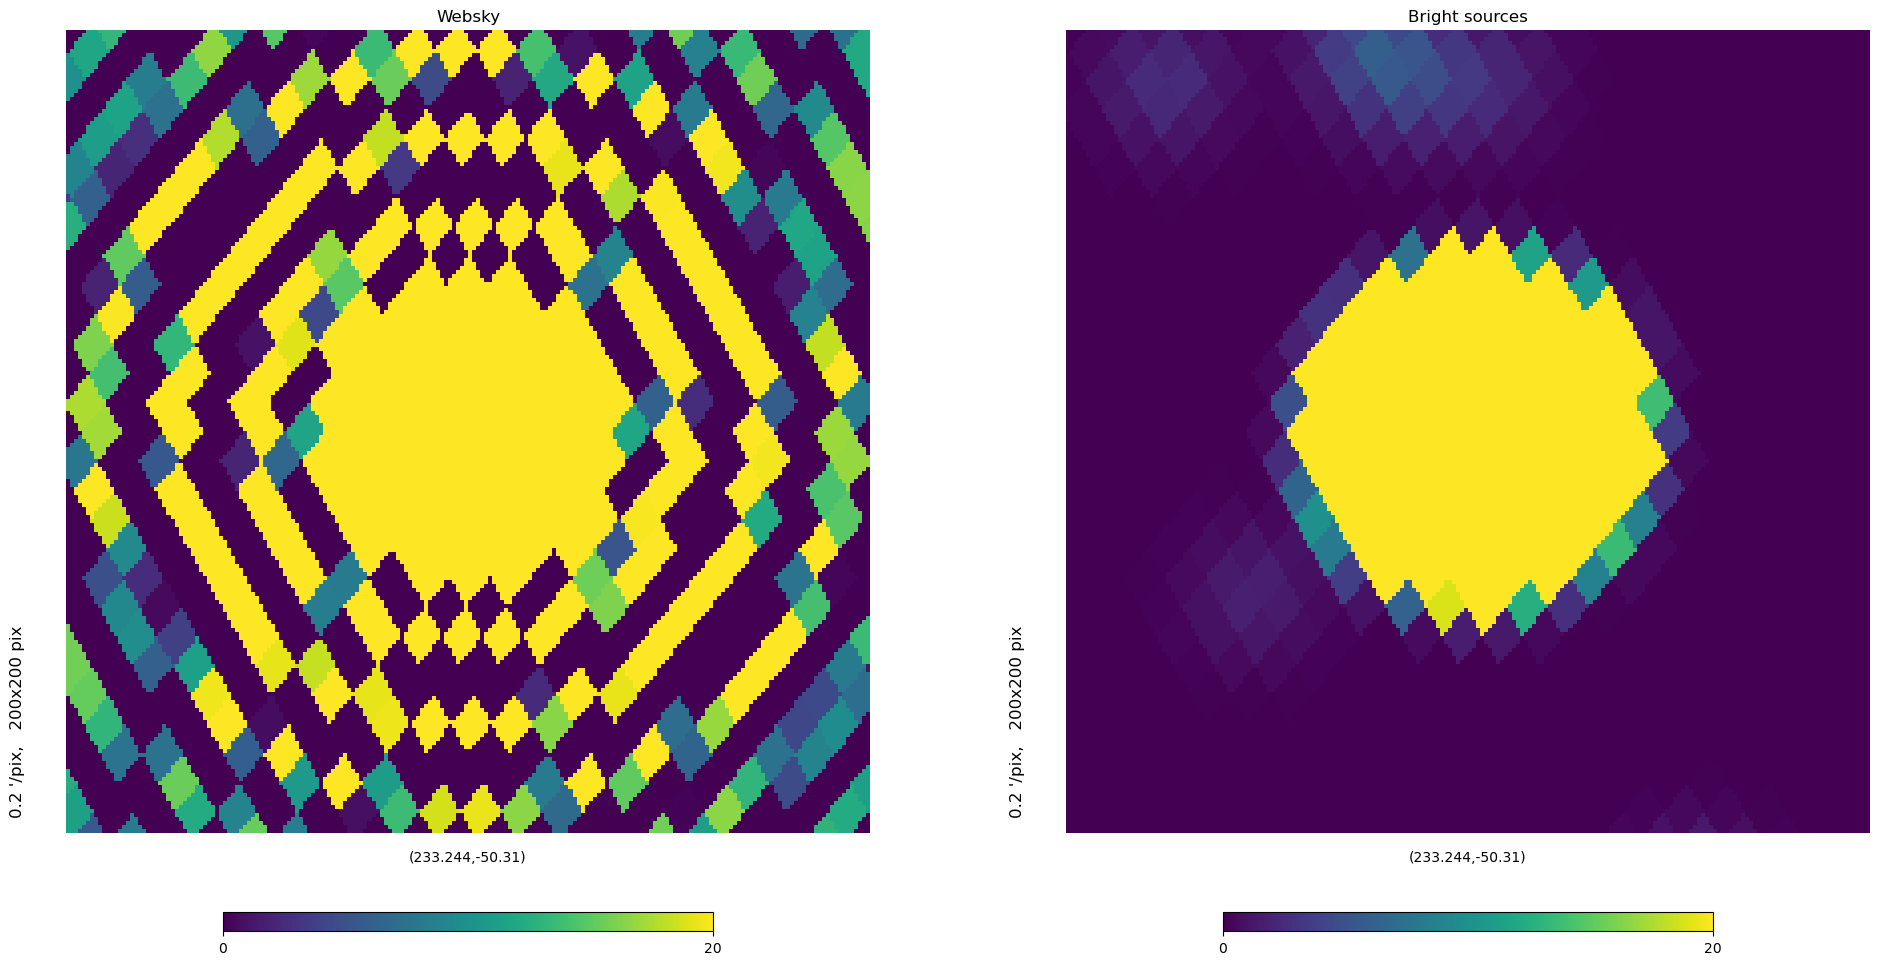

In [24]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], rot=(lon, lat), reso=.2, min=0, max=20, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], rot=(lon, lat), reso=.2, min=0, max=20, title="Bright sources", fig=fig, sub=122)

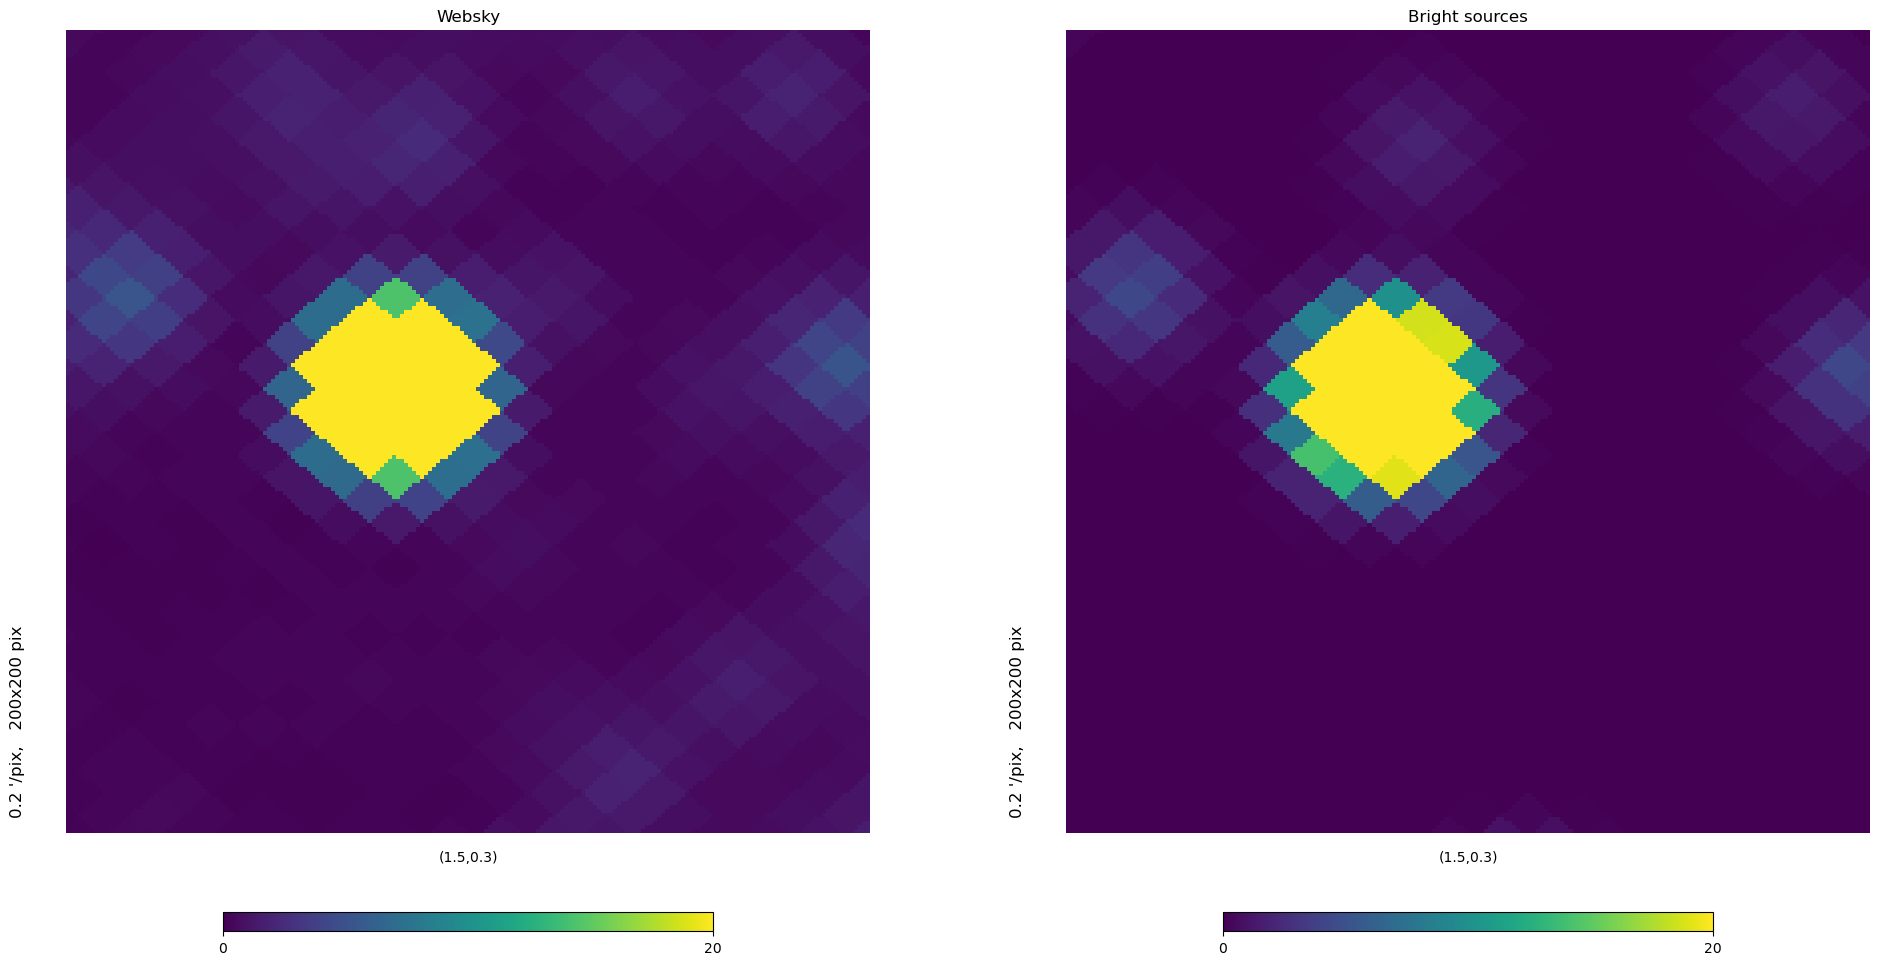

In [25]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], rot=(1.5, .3), reso=.2, min=0, max=20, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], rot=(1.5, .3), reso=.2, min=0, max=20, title="Bright sources", fig=fig, sub=122)

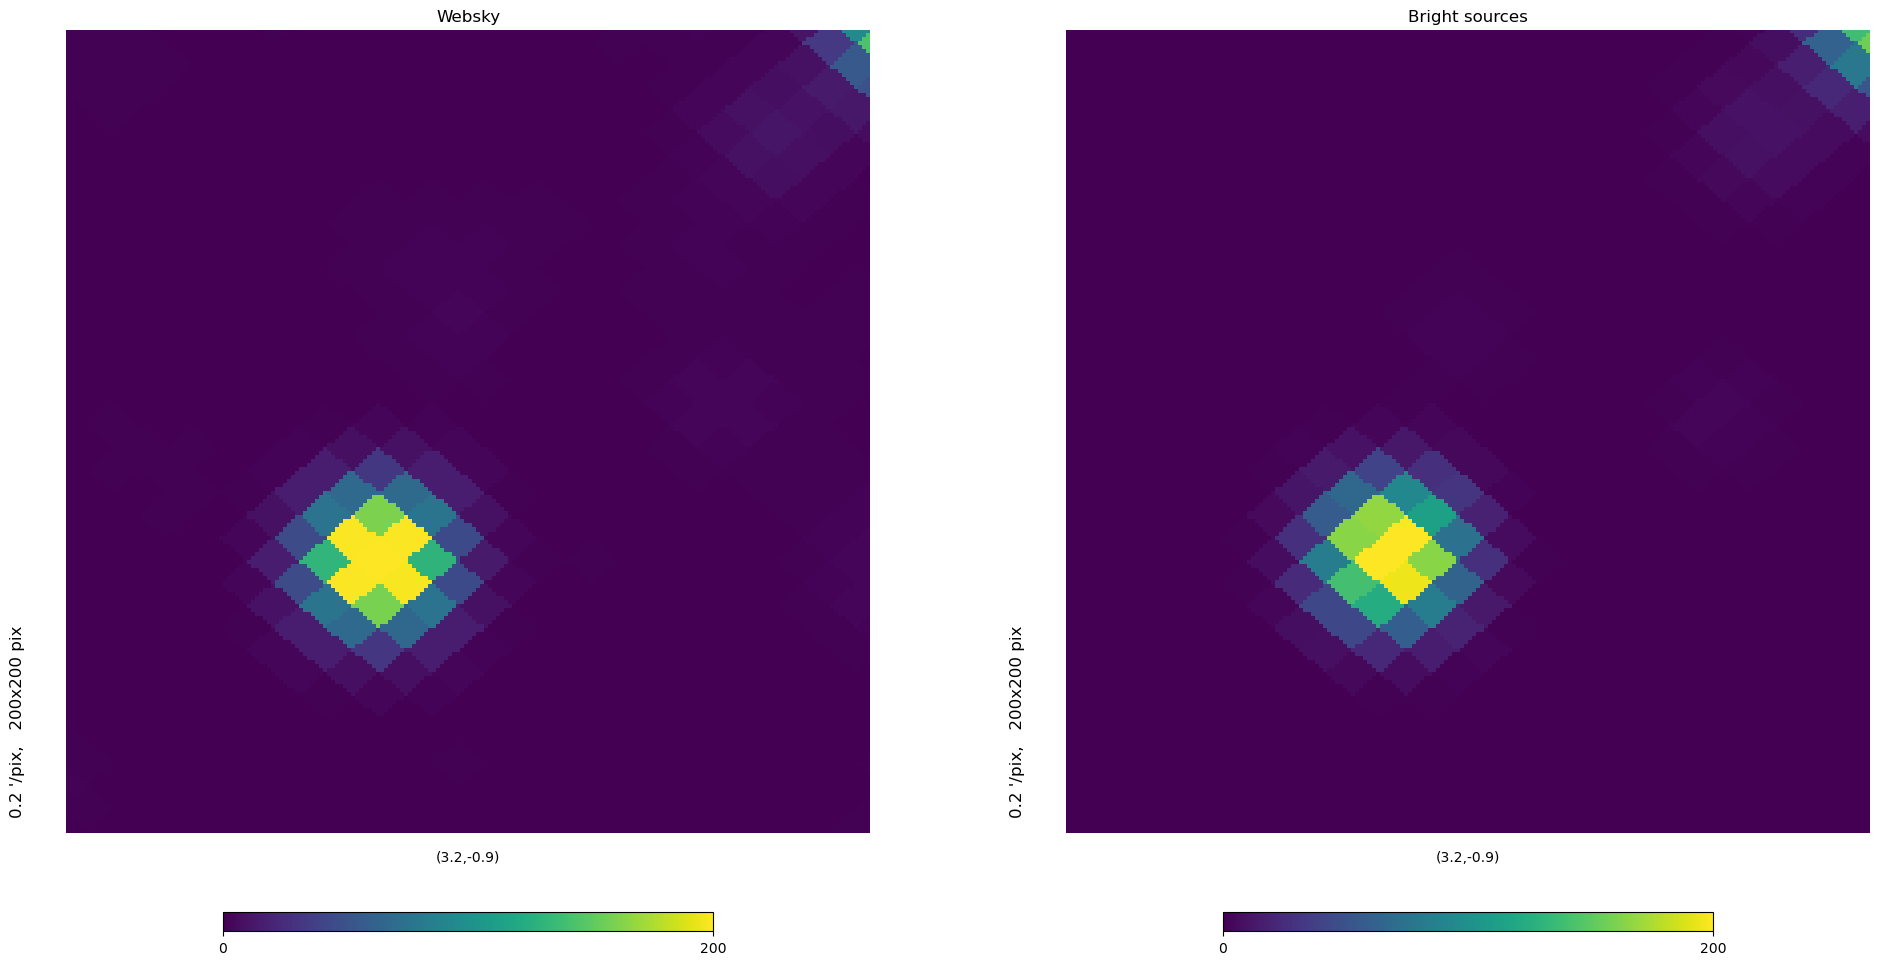

In [26]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], rot=(3.2, -.9), reso=.2, min=0, max=200, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], rot=(3.2, -.9), reso=.2, min=0, max=200, title="Bright sources", fig=fig, sub=122)

In [27]:
from pathlib import Path
f = Path("/global/homes/z/zonca/prjcmb/www/pysm-data/websky/0.4/radio_catalog") / str(nside)

In [28]:
from pixell import enmap

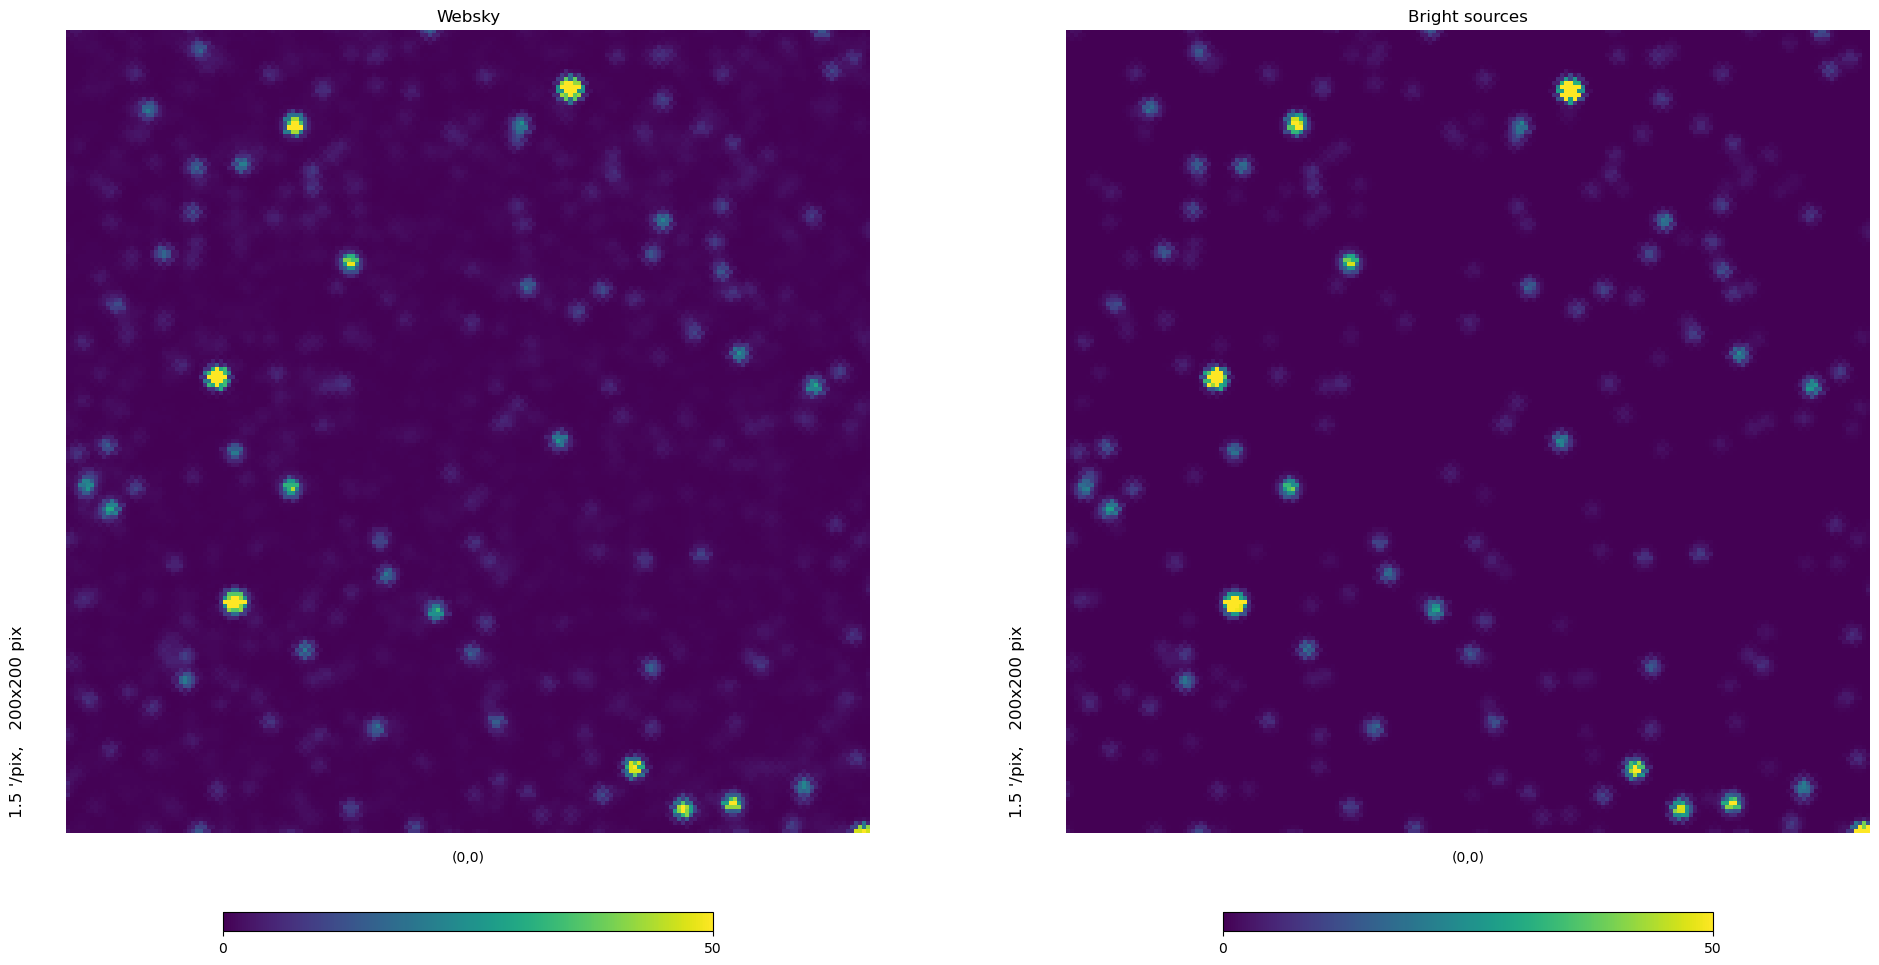

In [29]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], min=0, max=50, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], min=0, max=50, title="Bright sources", fig=fig, sub=122)

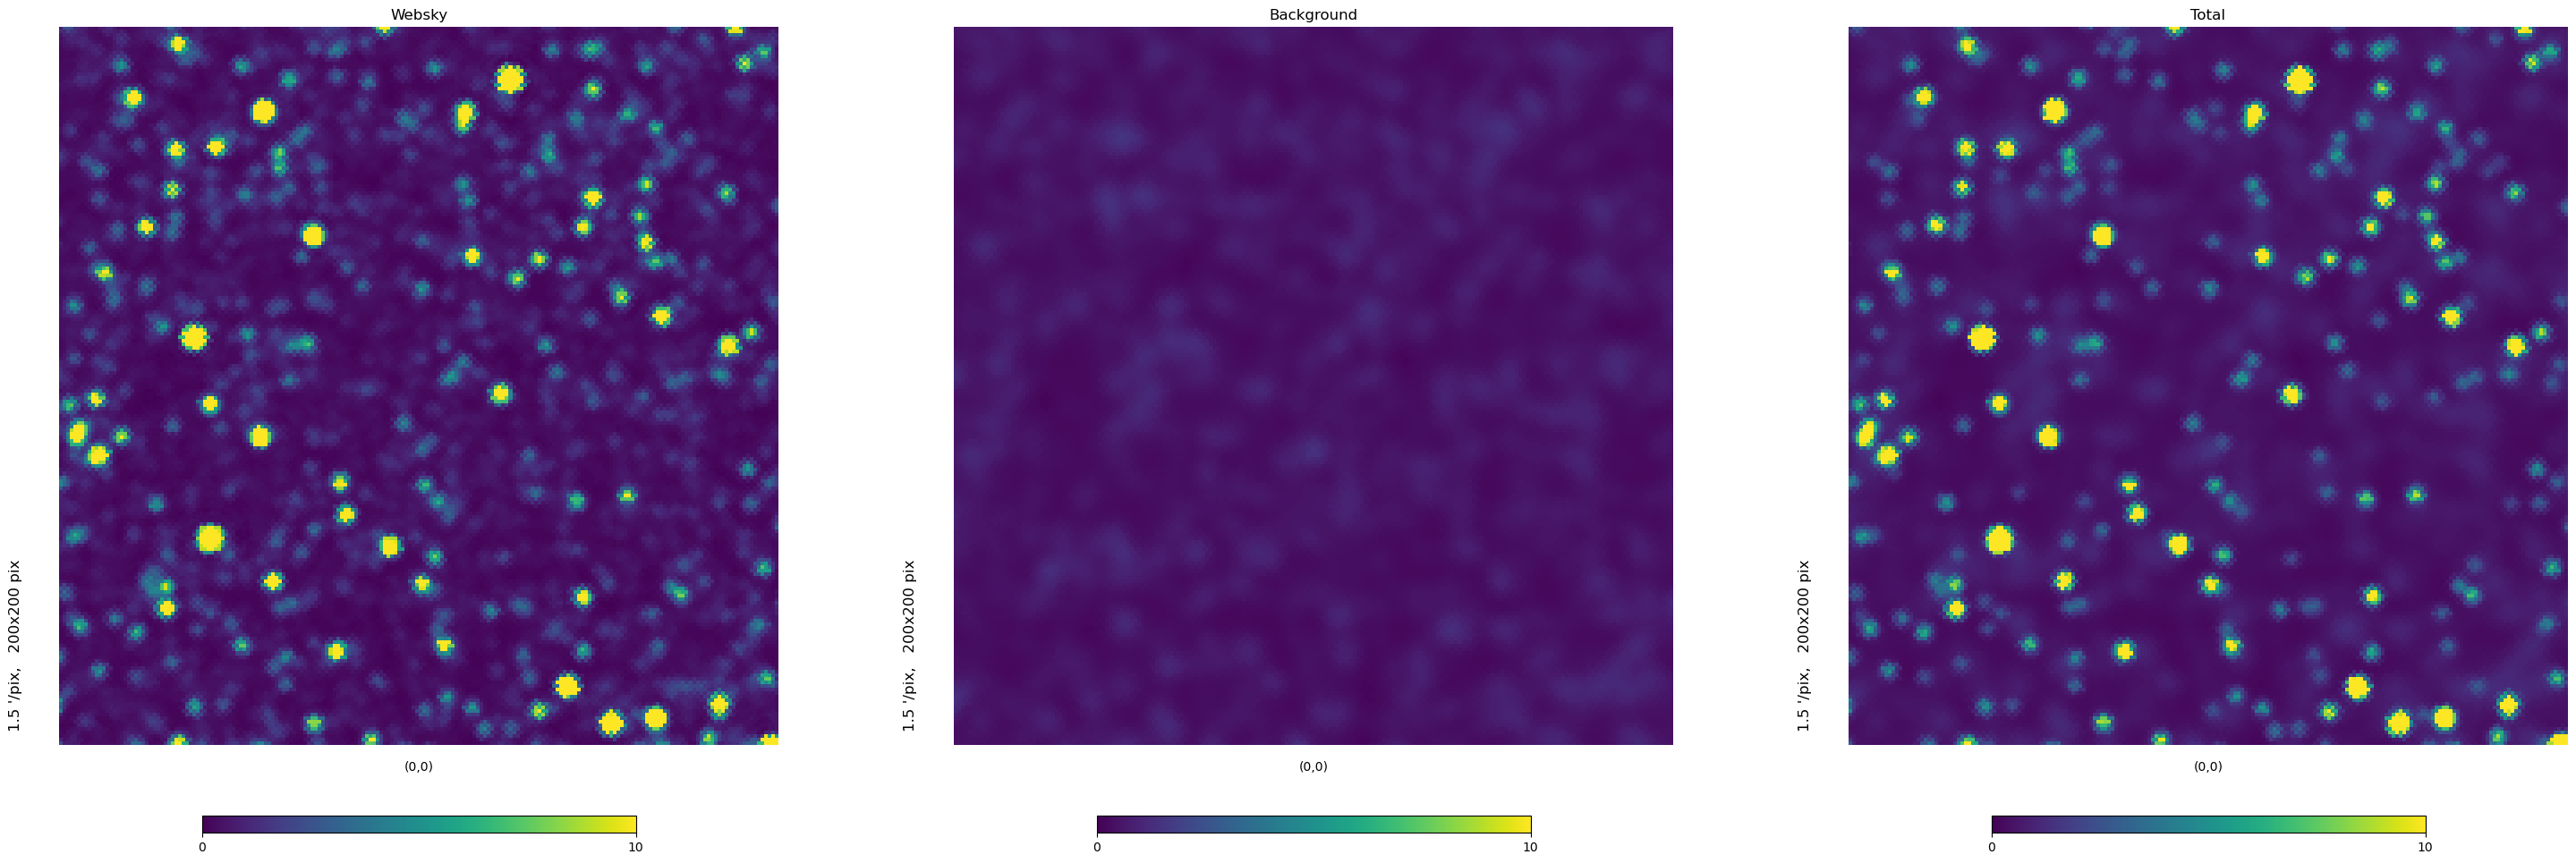

In [30]:
fig = plt.figure(figsize=(30,10))
hp.gnomview(websky[0], min=0, max=10, title="Websky", fig=fig, sub=131)
hp.gnomview(background[0], min=0, max=10, title="Background", fig=fig, sub=132)
hp.gnomview(bright[0]+background[0], min=0, max=10, title="Total", fig=fig, sub=133)

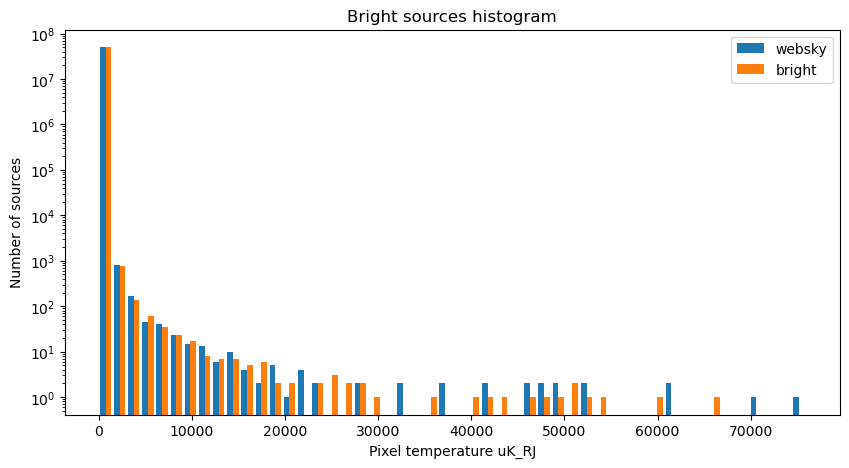

In [31]:
plt.figure(figsize=(10, 5))
plt.hist([websky[0].value, bright[0].value], density=False, bins=50, log=True,
         label=["websky", "bright"])
plt.legend()
plt.xlabel(f'Pixel temperature {websky.unit}')
plt.ylabel('Number of sources')
plt.title("Bright sources histogram")
plt.show()

In [32]:
bins = np.linspace(0, background.max().value, 50)

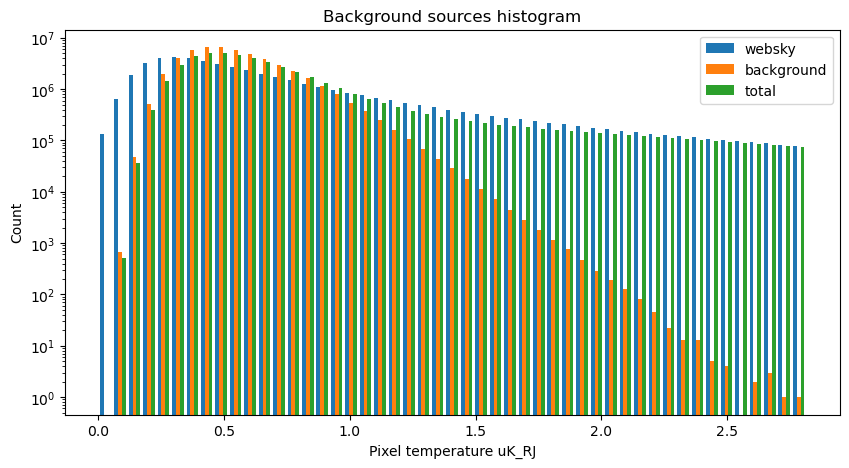

In [33]:
plt.figure(figsize=(10, 5))

plt.hist([websky[0].value, background[0].value, bright[0].value + background[0].value], density=False, bins=bins, log=True,
         label=["websky", "background", "total"])
plt.legend()
plt.xlabel(f'Pixel temperature {websky.unit}')
plt.ylabel('Count')
plt.title("Background sources histogram")
plt.show()